In [3]:
import torch
import torch.nn as nn 
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. 데이터 생성

In [39]:
x_data = torch.arange(1, 6)
y_data = torch.arange(1, 6)

x = x_data.view(5, 1).float()
y = y_data.view(5, 1).float()
print("x :", x)
print("y :", y)

x : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y : tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])


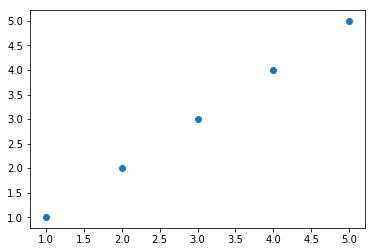

In [40]:
plt.scatter(x_data, y.data)
plt.show()

### Derive Normal Equation (부록)

In [41]:
# xtx = torch.mm(x.t(),x)
# xtx

In [42]:
# xtx_inv = xtx.inverse()
# xtx_inv_xt = torch.mm(xtx_inv, x.t())

In [43]:
# w = torch.mm(xtx_inv_xt, y)
# w.item()

# 2-1. Grad와 모델정의, loss(cost) function

In [47]:
# 임의의 weight 선택
w = torch.rand(1,1) 
# w = 0.5
w.item()
# w

0.5785865783691406

In [48]:
w*x

tensor([[0.5786],
        [1.1572],
        [1.7358],
        [2.3143],
        [2.8929]])

기초 미분 공식
$\frac{d}{dx}f(x) = nx^{n-1}$

$\frac{d}{dx}(f(x)+g(x)) = \frac{d}{dx}f(x) + \frac{d}{dx}g(x)$

$\frac{d}{dx}(af(x)) = a\frac{d}{dx}f(x)$

$\frac{d}{dx}a = 0$ ->상수미분

$\frac{d}{dx}f(g(x)) = f’(g(x))g’(x)$ -> 체인 룰

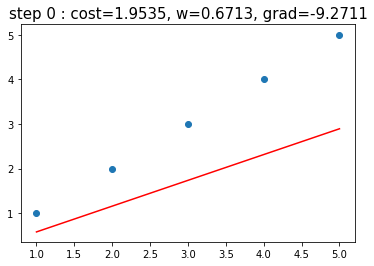

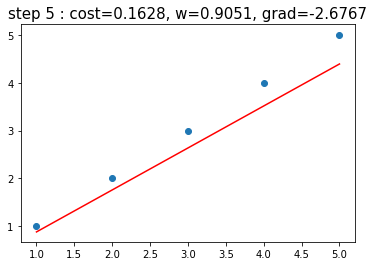

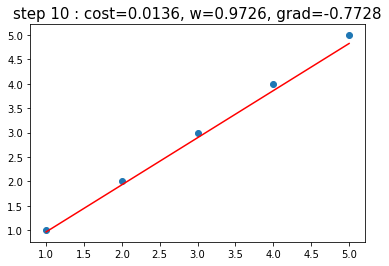

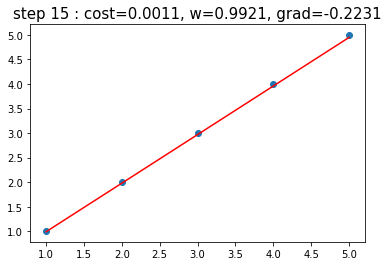

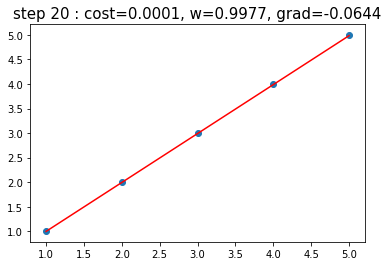

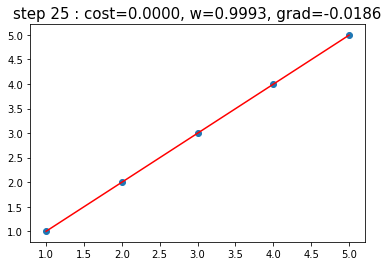

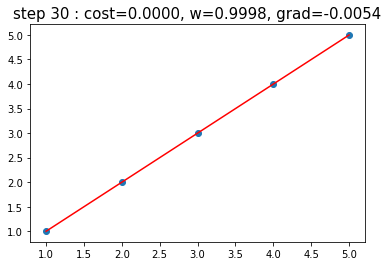

In [49]:
lr = 0.01 # 학습률

for step in range(35):
    pre = w*x # 답안
    
    # cost(mse) 계산
    # 오차를 제곱해서 전부 더하고 평균을 낸다. 
    cost = ((pre - y) ** 2).sum() / len(x)
    
    # MSE 비용함수를 미분하여 도함수를 구하기
    #(wx-y)^2를 W에 대해 편미분 시 2(wx-y)*x
    grad = 2*(pre-y).view(5).dot(x.view(5))/len(x)
    w -= lr*grad
    
    if step % 5 == 0 :
        plt.scatter(x, y)
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % (step, cost.item(), w.item(), grad.item()), fontdict={'size':15})
        plt.show()

In [50]:
# predict
x_new = torch.Tensor([6])
y_new = w*x_new
y_new.item()

5.999577522277832

## 2-2. nn.Linear와 Optimizer로 정의하기

In [51]:
x_data = torch.arange(1, 6, dtype=torch.float32)
y_data = x_data * 2

x = x_data.view(5, 1)
y = y_data.view(5, 1)
print("x :", x_data)
print("y :", y_data)

x : tensor([1., 2., 3., 4., 5.])
y : tensor([ 2.,  4.,  6.,  8., 10.])


In [52]:
model = nn.Linear(1, 1, bias = False)
model.weight
# Linear의 인자로는 1,1 이 들어갔는데, 이는 하나가 들어가서 한개의 결과를 나온다. 즉 선형회귀를 의미한다.
# requires_grad: ?? 

Parameter containing:
tensor([[0.3510]], requires_grad=True)

In [53]:
loss = nn.MSELoss() ## MES Cost(Loss) Function

# model의 파라미터에는 requires_grad = true로 나옴
optimizer = optim.SGD(model.parameters(), lr=0.01) # model에 대해 optimizer 설정

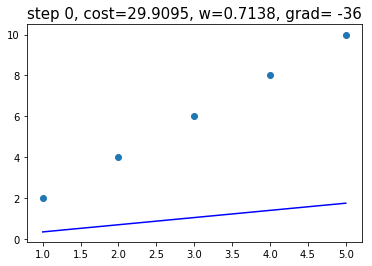

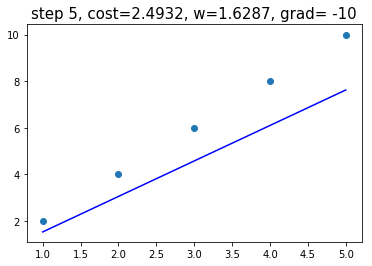

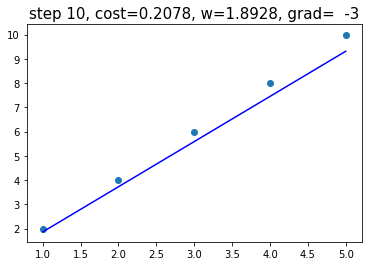

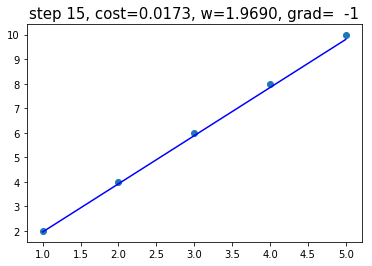

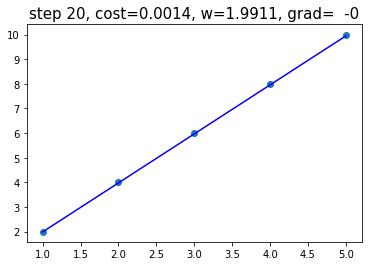

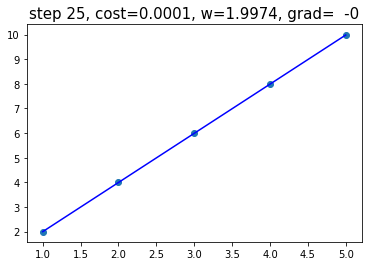

In [54]:
for step in range(30):
    pre = model(x)
    cost = loss(pre, y) # cost function
    
    optimizer.zero_grad()  # grad 초기화
    cost.backward() # 역전파. 결과로부터 시작으로 다시 돌아오게 된다.
    optimizer.step() # step만큼 이동시킨다. 즉 weight가 업데이트 된다. 
    
    
    if step % 5 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'b-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' 
                  % (step, cost.item() ,model.weight.item(), model.weight.grad.item()), fontdict={'size':15})
        plt.show()